<a href="https://colab.research.google.com/github/gunjyo0817/ML-Andrew-Lab/blob/main/ML_Andrew_Lab1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression with One Variable
First some context on the problem statement.

Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [ ]:
# read data
data = pd.read_csv('./ex1data1.txt', header = None) #read from dataset
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


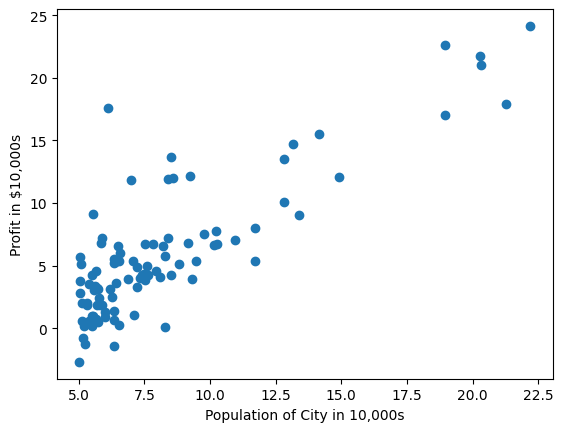

In [ ]:
# visualization
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [ ]:
# adding the intercept term
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 1500
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term

<ipython-input-16-67c159ded5b6>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
<ipython-input-16-67c159ded5b6>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [ ]:
# computing the cost
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)

32.072733877455676


In [ ]:
# find the optimal parameters using Gradient Descent
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)
J = computeCost(X, y, theta)
print(J)

[[-3.63029144]
 [ 1.16636235]]
4.483388256587726


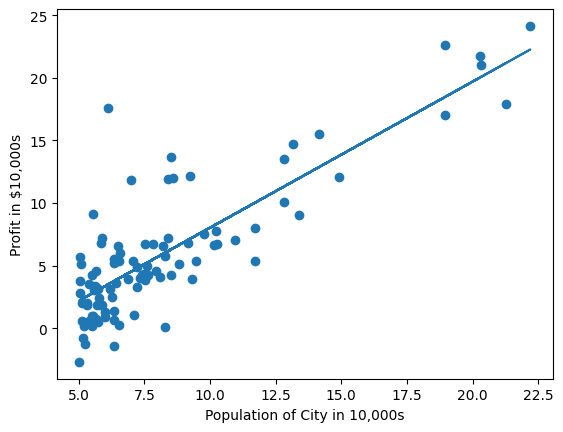

In [ ]:
# plot showing the best fit line
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()

# Linear Regression with multiple variables

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. Your job is to predict housing prices based on other variables.

In [ ]:
# read data
data = pd.read_csv('./ex1data2.txt', sep = ',', header = None)
X = data.iloc[:, 0:2] # read first two columns into X
y = data.iloc[:, 2] # read the third column into y
m = len(y) # no. of training samples
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
# feature normalization
X = (X - np.mean(X))/np.std(X)
print(X)

In [ ]:
# adding the intercept term and initializing parameters
ones = np.ones((m, 1))
X = np.hstack((ones, X))
alpha = 0.01
num_iters = 400
theta = np.zeros((3, 1))
y = y[:, np.newaxis]

<ipython-input-24-d6309e8ff47a>:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [ ]:
# compute the cost
def computeCostMulti(X, y, theta):
  temp = np.dot(X, theta) - y
  return np.sum(np.power(temp, 2)) / (2*m)
J = computeCostMulti(X, y, theta)
print(J)

65591548106.45744


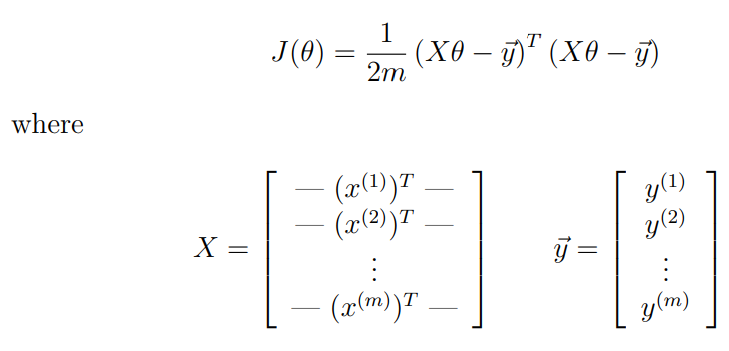

In [ ]:
# find the optimal parameters using Gradient Descent
def gradientDescentMulti(X, y, theta, alpha, iterations):
  for _ in range(iterations):
    temp = np.dot(X, theta) - y
    temp = np.dot(X.T, temp)
    theta = theta - (alpha/m) * temp
  return theta
theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
print(theta)
J = computeCostMulti(X, y, theta)
print(J)

[[340302.97100295]
 [107744.19899198]
 [ -4875.11193358]]
2044562883.3693335
